This script shows the sensitiviity test (temperature) of model simulation

In [1]:
import os, importlib, sys
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from os import listdir
from os.path import join, isfile

sys.path.insert(0, '../../code/src')
#importlib.reload(sys.modules['extract_model_data'])
from extract_model_data import extract_model_outfile, get_model_O3_sensitivity, merge_measure_model_data, plot_timeseries_measure_model, plot_scatter_measure_model_redlands, plot_scatter_measure_model_pasadena, extract_isopleth_output, line_intersection, get_CI_T_distribution

## Pasadena

In [2]:
filepath_basecase = '../../data/final/Chamber_model_result_chambertemp/pasadena_4km_2021_basecase_chambertemp.out'
filepath_NOx_addition = '../../data/final/Chamber_model_result_chambertemp/pasadena_4km_2021_NOx-addition_chambertemp.out'
df_model_pasadena_chambertemp = get_model_O3_sensitivity(filepath_basecase, filepath_NOx_addition)

In [3]:
filepath_basecase = '../../data/final/Chamber_model_result_ambienttemp/pasadena_4km_2021_basecase_ambienttemp.out'
filepath_NOx_addition = '../../data/final/Chamber_model_result_ambienttemp/pasadena_4km_2021_NOx-addition_ambienttemp.out'
df_model_pasadena_ambienttemp = get_model_O3_sensitivity(filepath_basecase, filepath_NOx_addition)

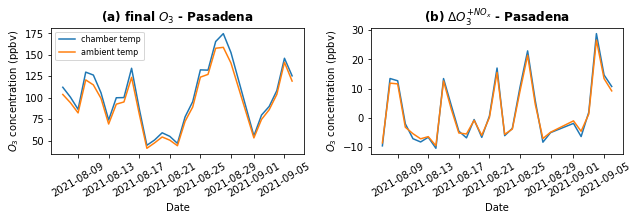

In [48]:
fig, ax=plt.subplots(1,2, figsize=(9,6))

ax[0].plot(df_model_pasadena_chambertemp['Date'], df_model_pasadena_chambertemp['O3_final'], label='chamber temp')
ax[0].plot(df_model_pasadena_ambienttemp['Date'], df_model_pasadena_ambienttemp['O3_final'], label='ambient temp')

ax[1].plot(df_model_pasadena_chambertemp['Date'], df_model_pasadena_chambertemp['delta_O3'], label='chamber temp')
ax[1].plot(df_model_pasadena_ambienttemp['Date'], df_model_pasadena_ambienttemp['delta_O3'], label='ambient temp')

ax[0].set_title('(a) final $O_3$ - Pasadena', fontweight='bold')
ax[1].set_title('(b) $\Delta O_3^{+NO_x}$ - Pasadena', fontweight='bold')

for i in range(2):
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('$O_3$ concentration (ppbv)')
    ax[0].legend(fontsize=8)
    ax[i].set_box_aspect(1/2)
    # set ax x ticks rotation 
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(30)

plt.tight_layout()
fig.savefig('../../result/time_series_model_sensitivity_pasadena.png', dpi=1200, bbox_inches='tight', facecolor='white')


## Redlands

In [4]:
filepath_basecase = '../../data/final/Chamber_model_result_chambertemp/redlands_4km_2021_basecase-cor-v2_chambertemp.out'
filepath_NOx_addition = '../../data/final/Chamber_model_result_chambertemp/redlands_4km_2021_NOx-addition-cor-v2_chambertemp.out'
df_model_redlands_chambertemp = get_model_O3_sensitivity(filepath_basecase, filepath_NOx_addition)

In [5]:
filepath_basecase = '../../data/final/Chamber_model_result_ambienttemp/redlands_4km_2021_basecase_ambienttemp.out'
filepath_NOx_addition = '../../data/final/Chamber_model_result_ambienttemp/redlands_4km_2021_NOx-addition_ambienttemp.out'
df_model_redlands_ambienttemp = get_model_O3_sensitivity(filepath_basecase, filepath_NOx_addition)

In [6]:
df_model_redlands_chambertemp = df_model_redlands_chambertemp.sort_values(by='Date')
df_model_redlands_ambienttemp = df_model_redlands_ambienttemp.sort_values(by='Date')

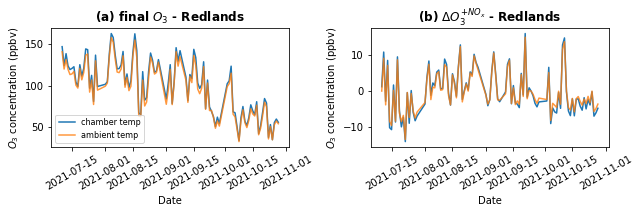

In [49]:
fig, ax=plt.subplots(1,2, figsize=(9,6))

ax[0].plot(df_model_redlands_chambertemp['Date'], df_model_redlands_chambertemp['O3_final'], label='chamber temp')
ax[0].plot(df_model_redlands_ambienttemp['Date'], df_model_redlands_ambienttemp['O3_final'], label='ambient temp', alpha=0.8)

ax[1].plot(df_model_redlands_chambertemp['Date'], df_model_redlands_chambertemp['delta_O3'], label='chamber temp')
ax[1].plot(df_model_redlands_ambienttemp['Date'], df_model_redlands_ambienttemp['delta_O3'], label='ambient temp', alpha=0.8)

ax[0].set_title('(a) final $O_3$ - Redlands', fontweight='bold')
ax[1].set_title('(b) $\Delta O_3^{+NO_x}$ - Redlands', fontweight='bold')

for i in range(2):
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('$O_3$ concentration (ppbv)')
    ax[0].legend(fontsize=8, loc='lower left')
    ax[i].set_box_aspect(1/2)
    # set ax x ticks rotation 
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(30)

plt.tight_layout()
fig.savefig('../../result/time_series_model_sensitivity_redlands.png', dpi=1200, bbox_inches='tight', facecolor='white')

# Statistics

In [17]:
(df_model_pasadena_chambertemp['delta_O3'] / df_model_pasadena_ambienttemp['delta_O3']).std()

1.4553785834349455

In [25]:
(df_model_redlands_chambertemp['O3_final'] / df_model_redlands_ambienttemp['O3_final']).mean()

1.0450502063944598

In [30]:
ratio_deltaO3 = (df_model_redlands_chambertemp['delta_O3'] / df_model_redlands_ambienttemp['delta_O3'])[1:100].to_list()

In [43]:
list_deltaO3 = (df_model_redlands_chambertemp['delta_O3'] / df_model_redlands_ambienttemp['delta_O3'])

